# **DS Homework 1, Part 1**

**The Impact of September 11 on Air Travel in the U.S.** {60 points}

In 2006, the Bureau of Transportation Statistics conducted a study to evaluate the impacts of the September 11, 2001 terrorist attack on U.S. transportation. The goal of the study was to provide a greater understanding of the passenger travel behavior patterns of persons making long-distance trips before and after 9/11. Data on three monthly time series are given in the file Sept11Travel.xls for this period.

Actual Airline Reservations (Air)
Rail passenger miles (Rail), and
Vehicle miles traveled (Car)

1. Plot each of the three pre-event series (Air, Rail, Car).  {20 points}

((To be sure all code boxes run, runtime must be ran for all at the same time. Code from the previous box, affects the following box. Some code boxes will not run on their own without the prior code box being ran.))

In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
from datetime import datetime

In [ ]:
#import data and manipulate data
data=pd.read_excel("Sept11Travel.xls")

df = pd.DataFrame(data,
    columns = ['Month', 'Air RPM (000s)', 'Rail PM', 'Car (billions)'])
data.Month=pd.to_datetime(data.Month,
    format='%Y-%m')
data.set_index('Month', inplace=True)
df.sort_index(inplace=True)

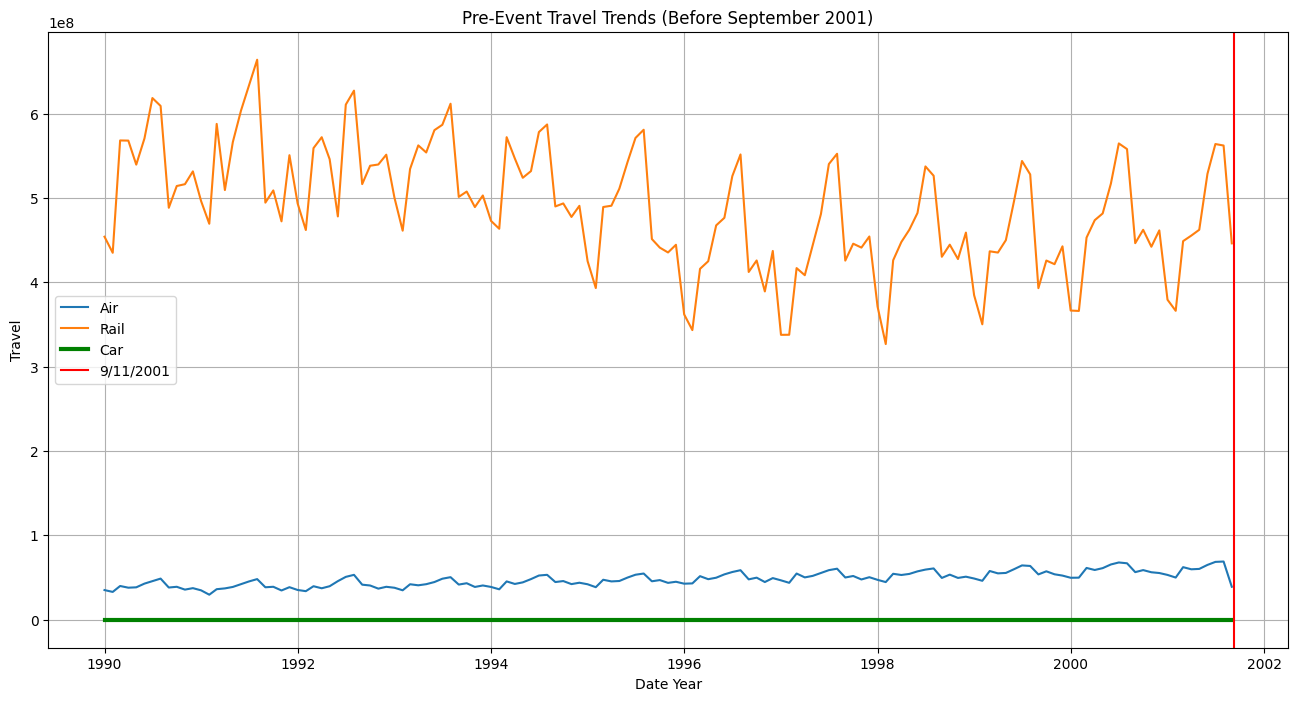

In [36]:
import matplotlib.pyplot as plt

#import data and manipulate data
data=pd.read_excel("Sept11Travel.xls")

df = pd.DataFrame(data,
    columns = ['Month', 'Air RPM (000s)', 'Rail PM', 'Car (billions)'])
data.Month=pd.to_datetime(data.Month,
    format='%Y-%m')
data.set_index('Month', inplace=True)
df.sort_index(inplace=True)

# Plotting pre-event series based on date range
pre_event_data = data[:'2001-09-10']

plt.figure(figsize=(16, 8))

plt.plot(pre_event_data.index, pre_event_data['Air RPM (000s)'], label='Air')
plt.plot(pre_event_data.index, pre_event_data['Rail PM'], label='Rail')
plt.plot(pre_event_data.index, pre_event_data['Car (billions)'], label='Car', color = 'green', linewidth='3')
plt.axvline(x=pd.to_datetime('2001-09-11'), color='red', linestyle='-', label='9/11/2001')
plt.xlabel('Date Year')
plt.ylabel('Travel')
plt.title('Pre-Event Travel Trends (Before September 2001)')
plt.legend()
plt.grid(True)

#plt.savefig("preeventtravel.png")  # Save as PNG
plt.show()

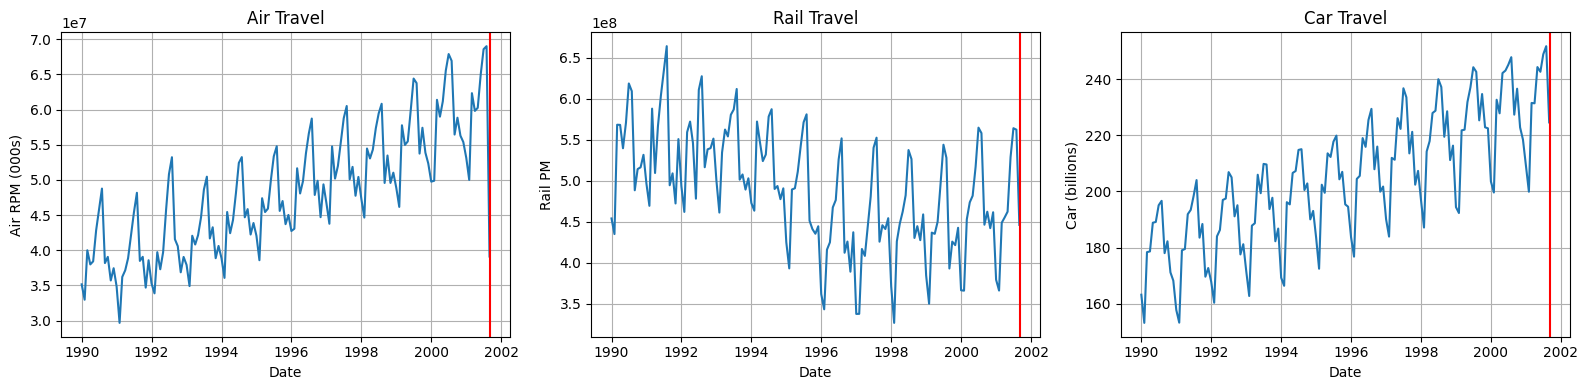

In [37]:
# Plotting pre-event series separately
pre_event_data = data[:'2001-09-10']

plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.plot(pre_event_data.index, pre_event_data['Air RPM (000s)'])
plt.axvline(x=pd.to_datetime('2001-09-11'), color='red', linestyle='-', label='9/11/2001')
plt.xlabel('Date')
plt.ylabel('Air RPM (000s)')
plt.title('Air Travel')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(pre_event_data.index, pre_event_data['Rail PM'])
plt.axvline(x=pd.to_datetime('2001-09-11'), color='red', linestyle='-', label='9/11/2001')
plt.xlabel('Date')
plt.ylabel('Rail PM')
plt.title('Rail Travel')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(pre_event_data.index, pre_event_data['Car (billions)'])
plt.axvline(x=pd.to_datetime('2001-09-11'), color='red', linestyle='-', label='9/11/2001')
plt.xlabel('Date')
plt.ylabel('Car (billions)')
plt.title('Car Travel')
plt.grid(True)

plt.tight_layout()
#plt.savefig("preeventseries.png")  # Save as PNG
plt.show()

3. Change the scale of the series and add trendlines. Do you notice any new trends?

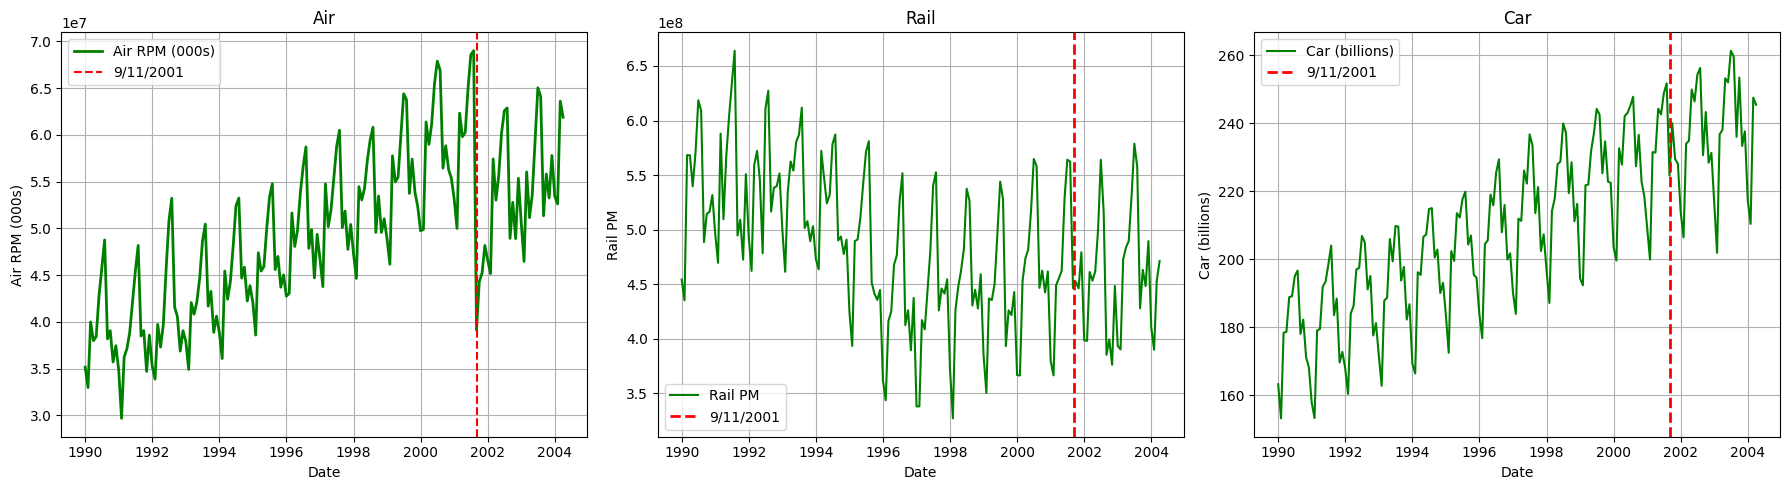

In [ ]:
#import libraries
import matplotlib.pyplot as plt
from scipy.signal import detrend

#import data and manipulate data
data=pd.read_excel("Sept11Travel.xls")

df = pd.DataFrame(data,
    columns = ['Month', 'Air RPM (000s)', 'Rail PM', 'Car (billions)'])
data.Month=pd.to_datetime(data.Month,
    format='%Y-%m')
data.set_index('Month', inplace=True)
df.sort_index(inplace=True)

# Plotting event series separately with trendlines and adjusted scale
event_data = data[:'2004-04']

plt.figure(figsize=(18, 5))

# Air
plt.subplot(1, 3, 1)
plt.plot(event_data.index, event_data['Air RPM (000s)'], label='Air RPM (000s)', color='green', linewidth='2')
plt.axvline(x=pd.to_datetime('2001-09-11'), color='red', linestyle='--', label='9/11/2001')
plt.xlabel('Date')
plt.ylabel('Air RPM (000s)')
plt.title('Air')
plt.grid(True)
plt.legend()

# Rail
plt.subplot(1, 3, 2)
plt.plot(event_data.index, event_data['Rail PM'], label='Rail PM', color='green')
plt.axvline(x=pd.to_datetime('2001-09-11'), color='red', linestyle='--', label='9/11/2001', linewidth='2')
plt.xlabel('Date')
plt.ylabel('Rail PM')
plt.title('Rail')
plt.grid(True)
plt.legend()

# Car
plt.subplot(1, 3, 3)
plt.plot(event_data.index, event_data['Car (billions)'], label='Car (billions)', color='green')
plt.axvline(x=pd.to_datetime('2001-09-11'), color='red', linestyle='--', label='9/11/2001', linewidth='2')
plt.xlabel('Date')
plt.ylabel('Car (billions)')
plt.title('Car')
plt.grid(True)
plt.legend()

plt.tight_layout()

#plt.savefig("adjustedtravels.png")  # Save as PNG
plt.show()

**-----------------------------------------------------------------------------------------------------------------**

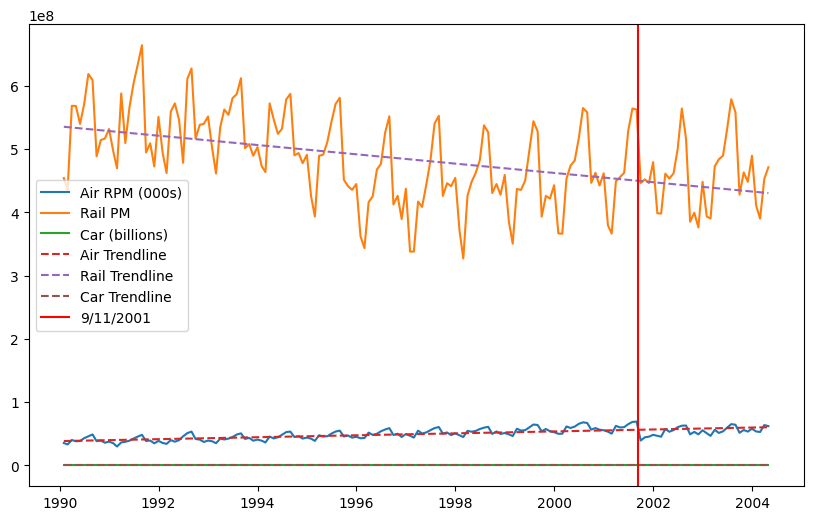

In [ ]:
# Change the scale of the series and add trendlines using Linear Regression

#importing libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

#import data and manipulate data
data=pd.read_excel("Sept11Travel.xls")

df = pd.DataFrame(data,
    columns = ['Month', 'Air RPM (000s)', 'Rail PM', 'Car (billions)'])
data.Month=pd.to_datetime(data.Month,
    format='%Y-%m')
data.set_index('Month', inplace=True)
df.sort_index(inplace=True)

#changing the scale
df_monthly = df.resample('ME', on='Month').mean()

# Resetting the column names after resampling
df_monthly.columns = df.columns[1:]  # Excluding the 'Month' column as it's in the index

# Function to perform linear regression and return the trendline
def get_linear_trend(series):
    X = np.array(range(len(series))).reshape(-1, 1)  # Create an array of indexes
    y = series.values  # Get the values of the series

    model = LinearRegression()
    model.fit(X, y)
    trendline = model.predict(X)  # Predicted values (trendline)
    return trendline

# Get the linear trendlines for each series
air_rpm_trend = get_linear_trend(df_monthly['Air RPM (000s)'])
rail_pm_trend = get_linear_trend(df_monthly['Rail PM'])
car_billions_trend = get_linear_trend(df_monthly['Car (billions)'])

# Plot the time series and trendlines
plt.figure(figsize=(10, 6))

# Plot each of the series
for column in df_monthly.columns:
    plt.plot(df_monthly.index, df_monthly[column], label=column)

# Plot the trendlines for Air RPM, Rail PM, and Car (billions)
plt.plot(df_monthly.index, air_rpm_trend, label='Air Trendline', linestyle='--')
plt.plot(df_monthly.index, rail_pm_trend, label='Rail Trendline', linestyle='--')
plt.plot(df_monthly.index, car_billions_trend, label='Car Trendline', linestyle='--')

# Marking 9/11/2001
plt.axvline(x=pd.to_datetime('2001-09-11'), color='red', linestyle='-', label='9/11/2001')

# Display the legend and show the plot
plt.legend()
plt.show()


**----------------------------------------------------------------------------------------------------------------------------**

The following is an extra graph from the Bureau of Transportation Statistics and was plotted for fun. I don't claim this as my code.

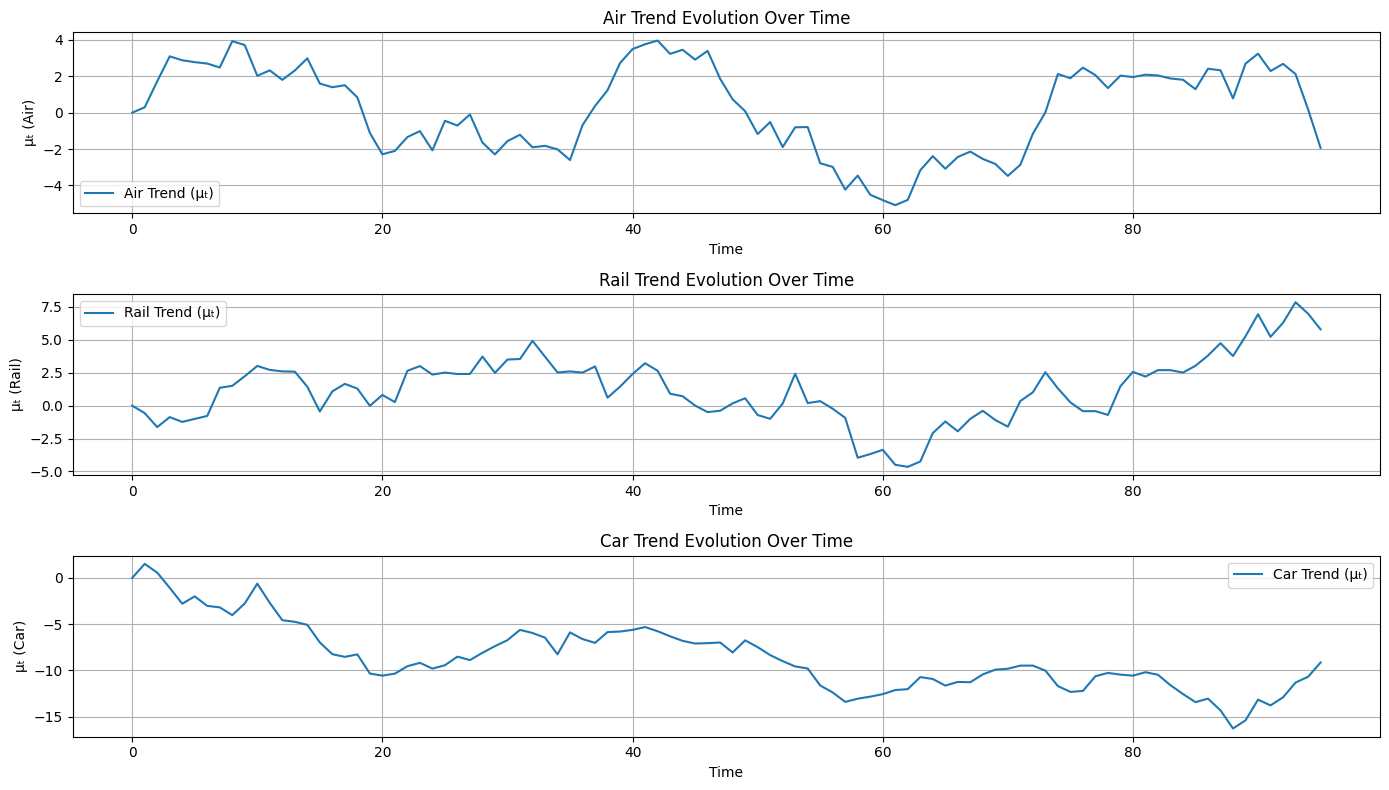

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
T = 96  # Total number of time steps (e.g., 10 years)
mu_0 = 0  # Initial trend for each mode
sigma = 1  # Standard deviation for the random shift (η_t)

# Generate random noise for η_t (random shifts for each mode)
eta_air = np.random.normal(0, sigma, T)  # Random shifts for air
eta_rail = np.random.normal(0, sigma, T)  # Random shifts for rail
eta_car = np.random.normal(0, sigma, T)  # Random shifts for car

# Initialize trend arrays for each mode
mu_air = np.zeros(T)
mu_rail = np.zeros(T)
mu_car = np.zeros(T)

# Set the initial trend value for each mode
mu_air[0] = mu_0
mu_rail[0] = mu_0
mu_car[0] = mu_0

# Simulate the evolution of the trends for each mode
for t in range(1, T):
    mu_air[t] = mu_air[t-1] + eta_air[t]  # Update air trend
    mu_rail[t] = mu_rail[t-1] + eta_rail[t]  # Update rail trend
    mu_car[t] = mu_car[t-1] + eta_car[t]  # Update car trend

# Plot the trends over time for air, rail, and car
time = np.arange(T)

plt.figure(figsize=(14, 8))

# Plot air trend
plt.subplot(3, 1, 1)
plt.plot(time, mu_air, label='Air Trend (µₜ)')
plt.title('Air Trend Evolution Over Time')
plt.xlabel('Time')
plt.ylabel('µₜ (Air)')
plt.legend()
plt.grid(True)

# Plot rail trend
plt.subplot(3, 1, 2)
plt.plot(time, mu_rail, label='Rail Trend (µₜ)')
plt.title('Rail Trend Evolution Over Time')
plt.xlabel('Time')
plt.ylabel('µₜ (Rail)')
plt.legend()
plt.grid(True)

# Plot car trend
plt.subplot(3, 1, 3)
plt.plot(time, mu_car, label='Car Trend (µₜ)')
plt.title('Car Trend Evolution Over Time')
plt.xlabel('Time')
plt.ylabel('µₜ (Car)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# **DS Homework 1, Part 2**
**Forecasting Department Store Sales** {40 points}

The file DepartmentStoresSales.csv contains data on the quarterly sales for a department store over a 6-year period.

1. Create a well-formatted time plot of the data

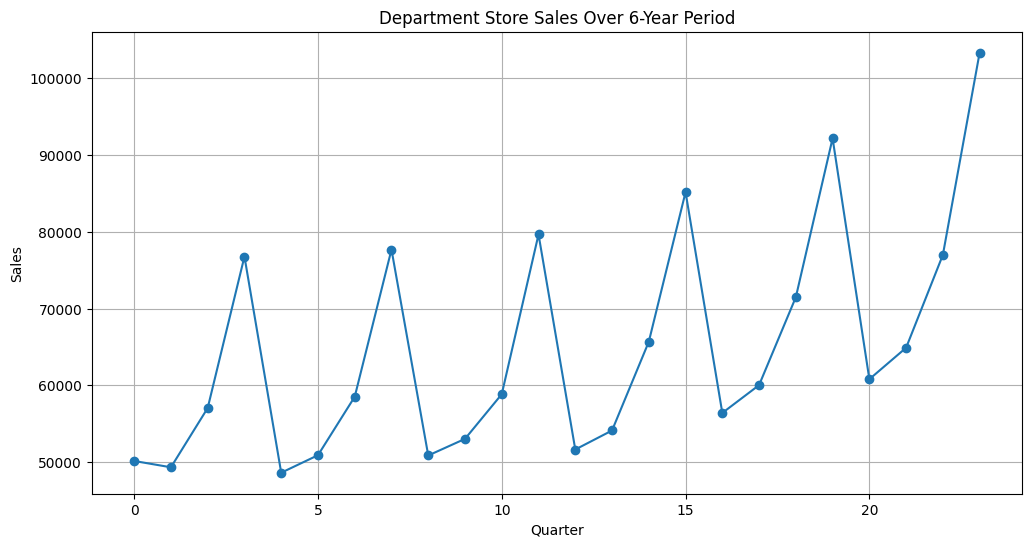

In [ ]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

#import data
data=pd.read_csv("DepartmentStoreSales.csv")
df = pd.DataFrame(data,
    columns = ['Quarter', 'Sales'])

# Plot the time series
plt.figure(figsize=(12, 6))

#df.groupby('Quarter').sum().plot()

plt.plot(df.index, df['Sales'], marker='o', linestyle='-')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.title('Department Store Sales Over 6-Year Period')
plt.grid(True)
plt.show()

In [ ]:
#Show more detailed statistics
df.describe()

,Quarter,Sales
count,24.000000,24.000000
mean,12.500000,64757.375000
std,7.071068,14961.523379
min,1.000000,48617.000000
25%,6.750000,52681.000000
50%,12.500000,59440.000000
75%,18.250000,76835.000000
max,24.000000,103337.000000


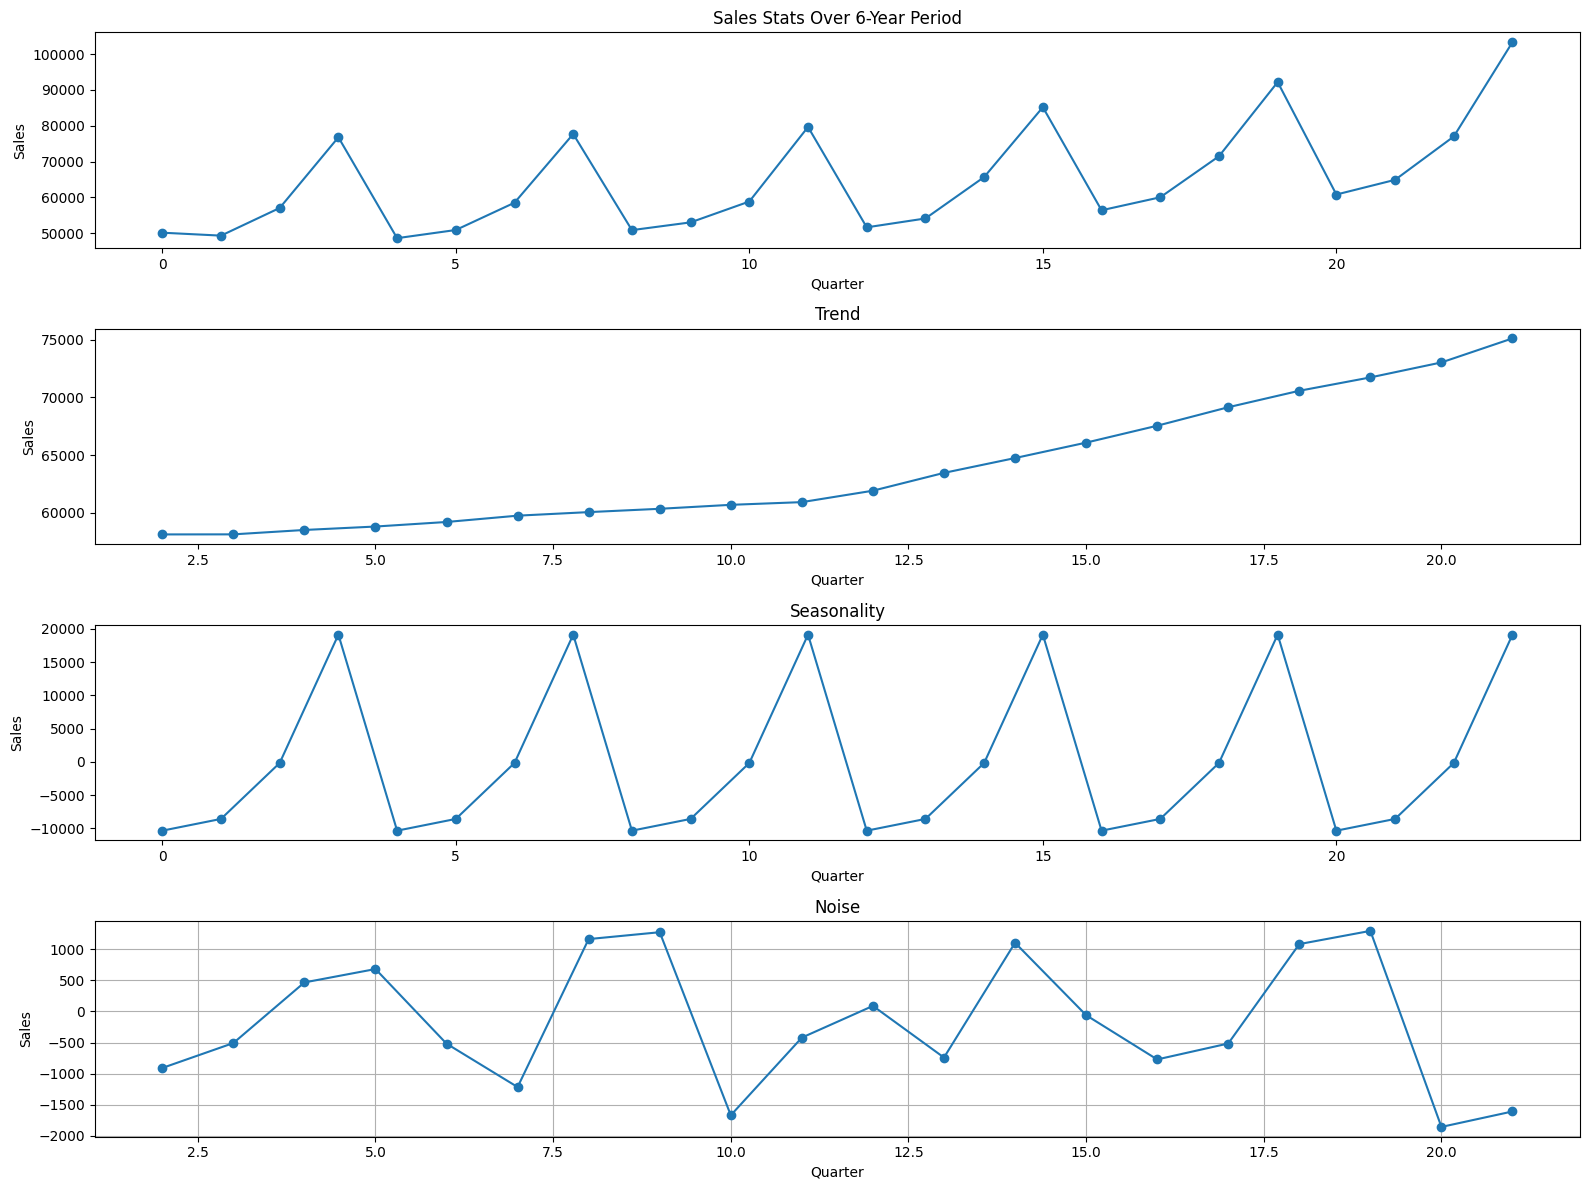

In [33]:
# plotting using seasonal decomposition
decomposition = seasonal_decompose(data["Sales"], model="additive", period=4)

# Plot different components, trend, seasonality, and noise
fig, axes = plt.subplots(4, 1, figsize=(16, 12))
decomposition.observed.plot(ax=axes[0], title="Sales Stats Over 6-Year Period", xlabel="Quarter", ylabel="Sales", marker='o', linestyle='-')
decomposition.trend.plot(ax=axes[1], title="Trend", xlabel="Quarter", ylabel="Sales", marker='o', linestyle='-')
decomposition.seasonal.plot(ax=axes[2], title="Seasonality", xlabel="Quarter", ylabel="Sales", marker='o', linestyle='-')
decomposition.resid.plot(ax=axes[3], title="Noise", xlabel="Quarter", ylabel="Sales", marker='o', linestyle='-')
plt.grid(True)
plt.tight_layout()
plt.show()